In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
uebb = dl.load_uebb_data(from_raw=False)

In [3]:
#####################################################
####### See run.py for details on parameters ########
#####################################################

dataset_name = "uebb"

# Each shift creates a model for a specific time horizon
# e.g. shift = 6 means target column gets shiftet by 6 * 10 min
shifts = [1,6,144]

# Each model (potentially) works with a different ML algorithm
# Options: "xgboost1","xgboost2", "xgboost_HPO", "linreg", "rf" (=random forests)
#
# linreg because this already beat the benchmark
models_names = ["linreg", "linreg", "linreg"]

# Choice of columns based on potential physical influence on power
col_to_be_lagged = ["power", "air_density", 'wind_speed_nacelle', 
                    "sonic_wind_direction", "sonic_wind_speed", 
                    'wind_speed_cube2', 'relative_humidity1',
                    'wind_speed2', 'wind_direction2', 'wind_speed_std1', 'wind_speed_max1']

# Require non_nan_percentage % many non-NaN values for a column to remain
# lower than at kelmarsh because original data set has only 40 columns
non_nan_percentage = 80 

# Standard choices 
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]

## Run models

In [4]:
models = run.pipeline(
    uebb,
    models_names,
    dataset_name,
    shifts,
    non_nan_percentage, 
    col_to_be_lagged,
    val_ratio, scalers)

Finished training on uebb for 10min horizon
Finished training on uebb for 1 hour horizon
Finished training on uebb for 1 day horizon


## Metrics

In [5]:
visualizations.plot_metrics("Beberide", models)

| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Beberide 10min horizon  |  52.419 |          55.4172 |  34.4326 |         36.245  |
| Beberide 1 hour horizon | 111.705 |         119.25   |  79.5705 |         81.9437 |
| Beberide 1 day horizon  | 178.472 |         196.742  | 130.307  |        151.508  |


The benchmark was beaten for all three hoirzons. The imporvement is small for the 10min and 1 hour horizon and a bit larger for the 1 day horizon. In absolute values the RMSE adn MAE are a lot better than at kelmarsh wind farm which indicates that the model is able to model the truth reasonably well.

## Plot results

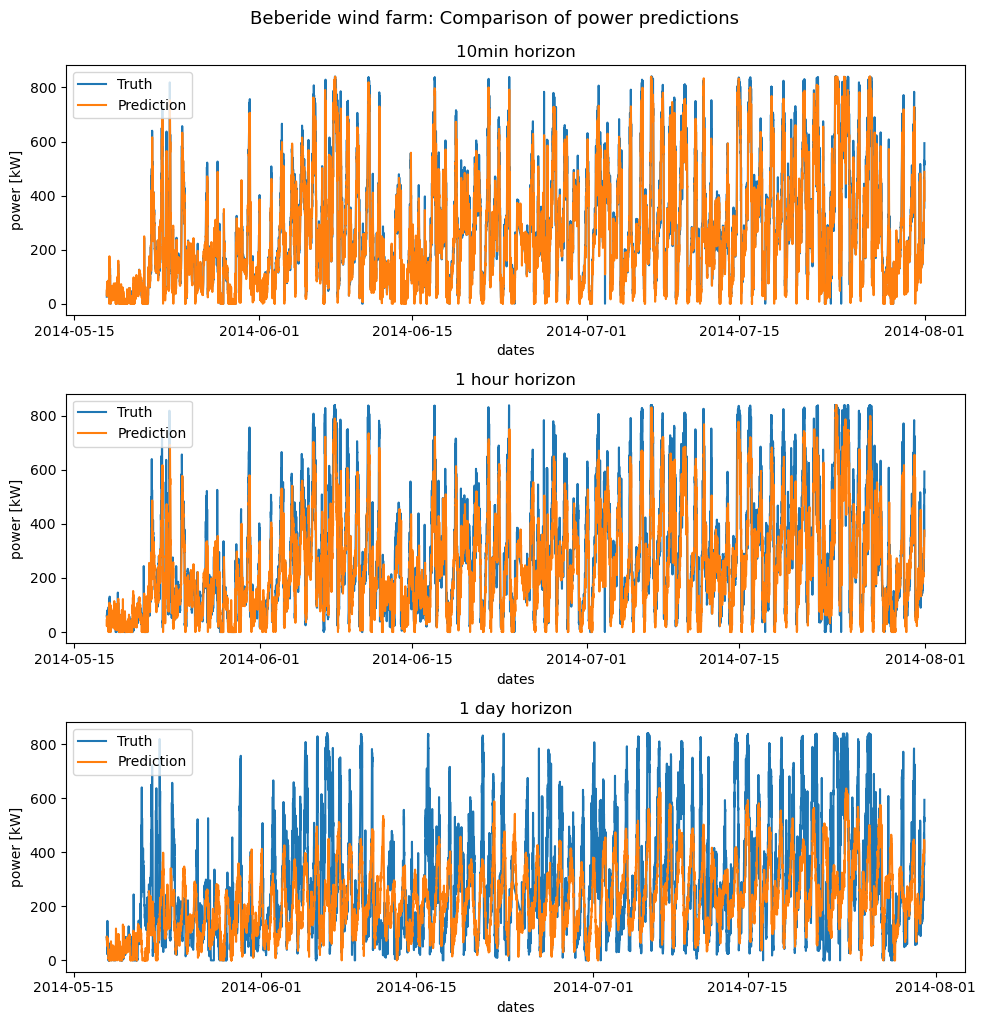

In [6]:
visualizations.plot_models("Beberide", models)

The plots show that the model is able to pick up the daily wind cycles for all three time horizons. As for kelmarsh wind farm, the model stays closer the the average power for the longest time horizon.